<a href='https://indicium.ai/'><img src='./assets/67e3ab9e506a939a543f848f_Logo-full-color (1).png'/></a>

---

# Data Science Challenge – Movie Analysis and Predictive Modeling

- This notebook was developed as part of the Indicium "Programa Lighthouse | Formação em Dados e IA" recruitment process. Its purpose is to explore a movie industry dataset, extract meaningful business-oriented insights and build a predictive model to better understand which factors drive a movie’s success and provide guidance on the type of film that should be developed next.

## Part 1: EDA (Exploratory Data Analysis)

- In this section of the notebook, the goal is to explore and manipulate the dataset, identify key patterns and relationships between variables and generate insights that can support data-driven decision-making.

### Starting Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Overview

In [2]:
df = pd.read_csv("./data/desafio_indicium_imdb.csv")
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB
None


- As shown above, the dataset contains an unnecessary `Unnamed: 0` column. Moreover, the `Gross`, `Runtime` and `Released_Year` columns are stored as object types. Let’s clean and fix these issues.

#### Transformations

In [4]:
df = df.drop(columns=['Unnamed: 0'])

df['Gross'] = df['Gross'].str.replace('[\,]', '', regex=True).astype(float)
df['Runtime'] = df['Runtime'].str.replace(' min','').astype(int)

- To fix the `Released_Year` issue, we first need to note that there is one row with incorrect data. We will correct this row first and then proceed with the conversion.

In [5]:
df[df['Released_Year'] == 'PG'] # This movie has its certificate swapped with its released year.

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,173837933.0


In [6]:
df.loc[965, 'Released_Year'] = 1995  # correct released year for Apollo 13
df.loc[965, 'Certificate'] = 'PG' # correct certificate for Apollo 13

In [7]:
df['Released_Year'] = df['Released_Year'].astype(int)

 - Now, our columns `Released_Year`, `Gross` and `Runtime` are all numeric. However, we can still perform additional transformations. The `Genre` column is of object type and contains many genres, which may not be directly useful for a future ML model. Therefore, we will apply one-hot encoding to this column.

In [8]:
genres_dummies = df['Genre'].str.get_dummies(sep=', ')
df = pd.concat([df, genres_dummies], axis=1)

In [9]:
df = df.drop('Genre', axis=1)

In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    int64  
 4   IMDB_Rating    999 non-null    float64
 5   Overview       999 non-null    object 
 6   Meta_score     842 non-null    float64
 7   Director       999 non-null    object 
 8   Star1          999 non-null    object 
 9   Star2          999 non-null    object 
 10  Star3          999 non-null    object 
 11  Star4          999 non-null    object 
 12  No_of_Votes    999 non-null    int64  
 13  Gross          830 non-null    float64
 14  Action         999 non-null    int64  
 15  Adventure      999 non-null    int64  
 16  Animation      999 non-null    int64  
 17  Biography      999 non-null    int64  
 18  Comedy    

- Finally, let's examine the dataset shape.

#### Dataset Dimensions

In [11]:
print(f"The dataset contains {len(df)} rows and {len(df.columns)} columns.")
print("\nColumns:", df.columns)
print("\nSize:", df.size)

The dataset contains 999 rows and 35 columns.

Columns: Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross', 'Action', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Drama', 'Family',
       'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

Size: 34965


### Data Cleaning

In [12]:
num_dup = df.duplicated().sum()
num_nans = df.isna().sum().sum()
perc_nans = (num_nans / df.size) * 100
print(f"The dataset contains {num_dup} duplicates and {num_nans} NaN values ({perc_nans:.2f}%).")

The dataset contains 0 duplicates and 427 NaN values (1.22%).


- There are not duplicates, but there's a significant number of NaN values that need to be addressed. Although they represent only 1.22% of the entire dataset, the `Certificate`, `Meta_score` and `Gross` columns have approximately 10%, 16% and 17% missing data, respectively. Let's then start the data cleaning process by first checking how many entries would be removed if we dropped them.

In [13]:
nan_cols = ['Certificate', 'Meta_score', 'Gross']
num_lines = (df[nan_cols].isna().any(axis=1)).sum()
print(f"Number of rows that would be dropped: {num_lines}")

Number of rows that would be dropped: 286


- Dropping 286 out of 999 rows would result in a loss of almost **30%** of the dataset. Instead of removing them, we need to explore alternative strategies for handling missing values. For the Certificate column, since it is categorical, we can safely impute missing entries without heavily impacting the future ML model. On the other hand, for Gross and Meta_score, we will keep the missing values as they are and rely on ML algorithms that are capable of handling NaNs directly.

In [14]:
df['Certificate'] = df['Certificate'].fillna('Not Rated')

In [15]:
num_nans = df.isna().sum().sum()
perc_nans = (num_nans / df.size) * 100
print(f"The dataset contains {num_nans} NaN values ({perc_nans:.2f}%).")

The dataset contains 326 NaN values (0.93%).


### Initial Insights

- Now, let's start developing our initial insights based on the types of columns in the dataset.

#### Numeric

In [16]:
genre_cols = genres_dummies.columns
df.drop(columns=genre_cols).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Released_Year,999.0,1.991218e+03,2.329717e+01,1920.0,1976.0,1999.0,2009.00,2020.0
Runtime,999.0,1.228719e+02,2.810123e+01,45.0,103.0,119.0,137.00,321.0
IMDB_Rating,999.0,7.947948e+00,2.722895e-01,7.6,7.7,7.9,8.10,9.2
Meta_score,842.0,7.796912e+01,1.238326e+01,28.0,70.0,79.0,87.00,100.0
No_of_Votes,999.0,2.716214e+05,3.209126e+05,25088.0,55471.5,138356.0,373167.50,2303232.0
Gross,830.0,6.808257e+07,1.098076e+08,1305.0,3245338.5,23457439.5,80876340.25,936662225.0


In [17]:
df.drop(columns=genre_cols).corr(numeric_only=True)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165831,-0.133355,-0.339297,0.246000,0.233198
Runtime,0.165831,1.000000,0.242751,-0.031604,0.172483,0.140002
IMDB_Rating,-0.133355,0.242751,1.000000,0.271374,0.479308,0.099393
Meta_score,-0.339297,-0.031604,0.271374,1.000000,-0.020091,-0.030480
No_of_Votes,0.246000,0.172483,0.479308,-0.020091,1.000000,0.589527
Gross,0.233198,0.140002,0.099393,-0.030480,0.589527,1.000000


- These results allow us to make some inferences:

1. **Differing Opinions**: It's interesting to notice that `IMDB_Rating`, a user-based rating, has a narrow range (7.6–9.2), while `Meta_score`, which come from professional critics, vary much more (28–100), suggesting that users and critics often disagree on the quality of a movie.
 
2. **Votes**: The `No_of_Votes` column shows a positive correlation with nearly all other features. Users seem to vote more for recent and longer movies. It also has a strong positive correlation with box office gross (0.59) and a moderate one with IMDb rating (0.48). This is intuitive: movies that attract larger audiences online tend to accumulate more votes on user-based platforms and also achieve better financial performance.
   
3. **Through the Years**: Over the decades, movies tend to show a gradual increase in box office gross. This growth in revenue is likely explained by inflation, larger international audiences and the increasing global reach of the movie industry.
   
4. **Ratings Importance**: When looking at the `Gross` column, we can see that ratings, whether from IMDb or Metacritic, are not strong predictors of box office performance, with correlations close to zero. This suggests that online reviews are not necessarily linked to financial success. However, as we observed in point 2, audience engagement (measured by the number of votes) plays a much stronger role, highlighting that popularity and reach matter more than perceived quality.

- Based on these perceptions, a movie’s success seems to depend more on **audience engagement and popularity** rather than ratings. While IMDb and critic scores do not strongly predict box office performance, films with more votes tend to earn more.

#### Categorical *(Overview)*

- Our goal in this subsection is to examine the `Overview` column and see if we can infer a movie's genre from its description. To do this, we will use a NLP technique called the **Bag of Words**, which represents text as a vector of word counts or frequencies.

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words='english')
bow = count_vect.fit_transform(df['Overview'])

In [19]:
bow_df = pd.DataFrame(bow.toarray(), columns=count_vect.get_feature_names_out())
bow_df

,00,000,007,10,100,100th,11,1183,12,13,...,zealander,zero,zodiac,zombie,zombies,zone,zorg,zuckerberg,zulu,édith
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bow_df.sum().sort_values(ascending=False).head(10)

young     132
man       119
life      111
world      85
new        73
family     66
war        66
woman      65
story      63
love       61
dtype: int64

- As shown above, we created a BoW dataset, where each unique word from every movie overview becomes a column and its occurrences form the rows. We then sorted the values to identify the 10 most common words in these summaries. Next, let's visualize the top genres to see if they align with our findings.

In [21]:
genre_counts = genres_dummies.sum().sort_values(ascending=False)
print(genre_counts)

Drama        723
Comedy       233
Crime        209
Adventure    196
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
Family        56
History       56
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
dtype: int64


- From these results, we can see that Drama stands out as the leading genre, most likely because it represents a very broad category. Words related to personal themes, such as “young”, “man” and “life”, tend to be indicative of this class. Other terms are more genre-specific, like “war” and “world” for Action, Adventure, or Crime and “love” and “story” for Romance. It is worth noting that genres with fewer films, such as Musical or Sport, may not exhibit strong word patterns due to limited representation. Overall, these findings suggest that the `Overview` column does indeed contain valuable information for inferring a movie’s genre.

### Data Visualization

- Since we have already identified some valuable information about factors that may contribute to a movie’s success from our initial insights, the next step is to visualize several plots to uncover additional conclusions. The idea is to start with a macro-level analysis and then dive deeper, exploring trends and details that can only be revealed through visualizations.

#### Average Gross Revenue by Genre Across 3-Year Periods

- This chart shows revenue trends for each genre over three-year blocks, roughly reflecting typical movie production cycles.

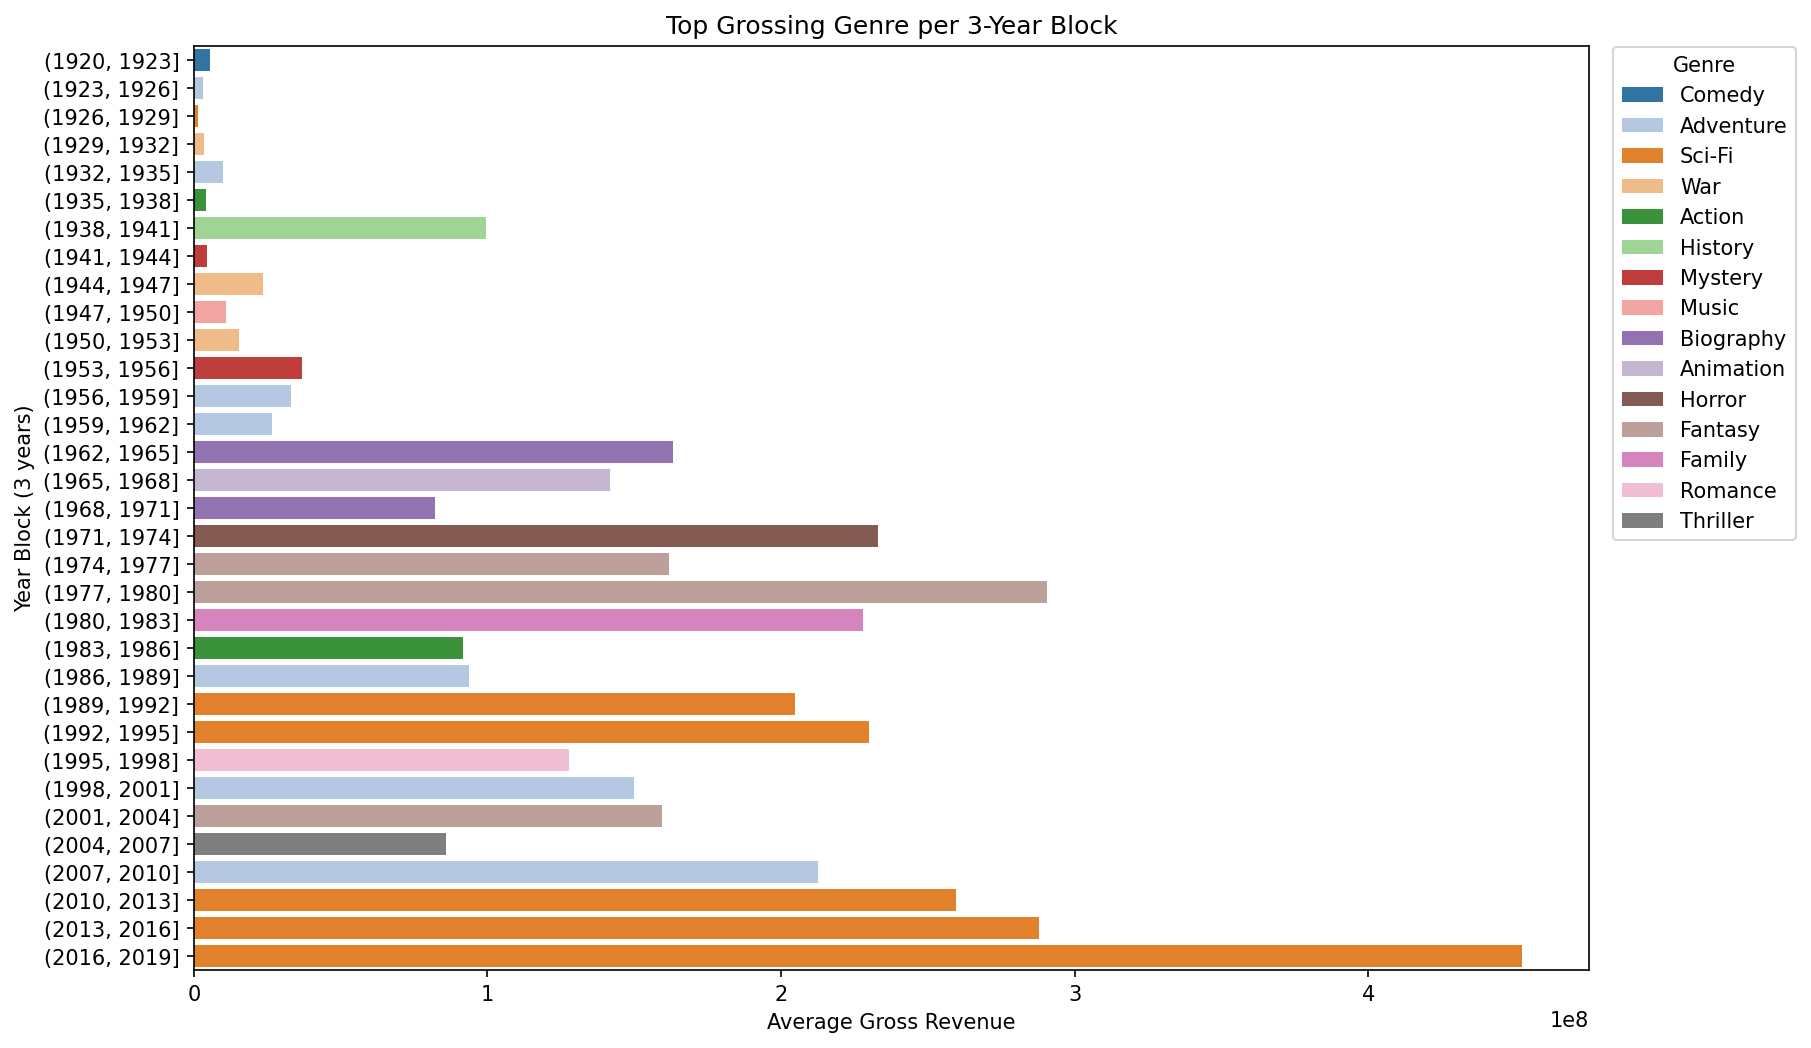

In [22]:
df['YearBlock'] = pd.cut(df['Released_Year'], bins=range(df['Released_Year'].min(), df['Released_Year'].max(), 3))

yb_gross_per_genre = df[genre_cols].multiply(df['Gross'], axis=0)
yb_gross_per_genre['YearBlock'] = df['YearBlock']

yb_sum_gross_per_genre = yb_gross_per_genre.groupby('YearBlock', observed=False).sum()
yb_count_per_genre = df.groupby('YearBlock', observed=False)[genre_cols].sum()
yb_avg_gross_per_genre = yb_sum_gross_per_genre.div(yb_count_per_genre)

yb_avg_gross_per_genre_df = pd.DataFrame({
    'Genre': yb_avg_gross_per_genre.idxmax(axis=1),
    'Gross': yb_avg_gross_per_genre.max(axis=1)
}).reset_index()

plt.figure(figsize=(12,8), dpi=150)
sns.barplot(data=yb_avg_gross_per_genre_df, y='YearBlock', x='Gross', hue='Genre', palette='tab20')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Year Block (3 years)')
plt.title('Top Grossing Genre per 3-Year Block')
plt.legend(title='Genre', bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.show()

- From the results above, a clear trend emerges: **Sci-Fi** is the genre of the moment. Despite ranking only 11th in total number of films, it consistently leads box office revenue over the past decade (2010–2019) when analyzed in three-year periods, indicating that a relatively small number of Sci-Fi productions generate disproportionately high revenue per movie. Such dominance is likely driven by franchise potential, international appeal and high production values.

#### Average Gross and Productivity of Sci-Fi Directors (Post-2010)

- Let’s explore the recent Sci-Fi boom. Perhaps audience interest is driven by specific directors.

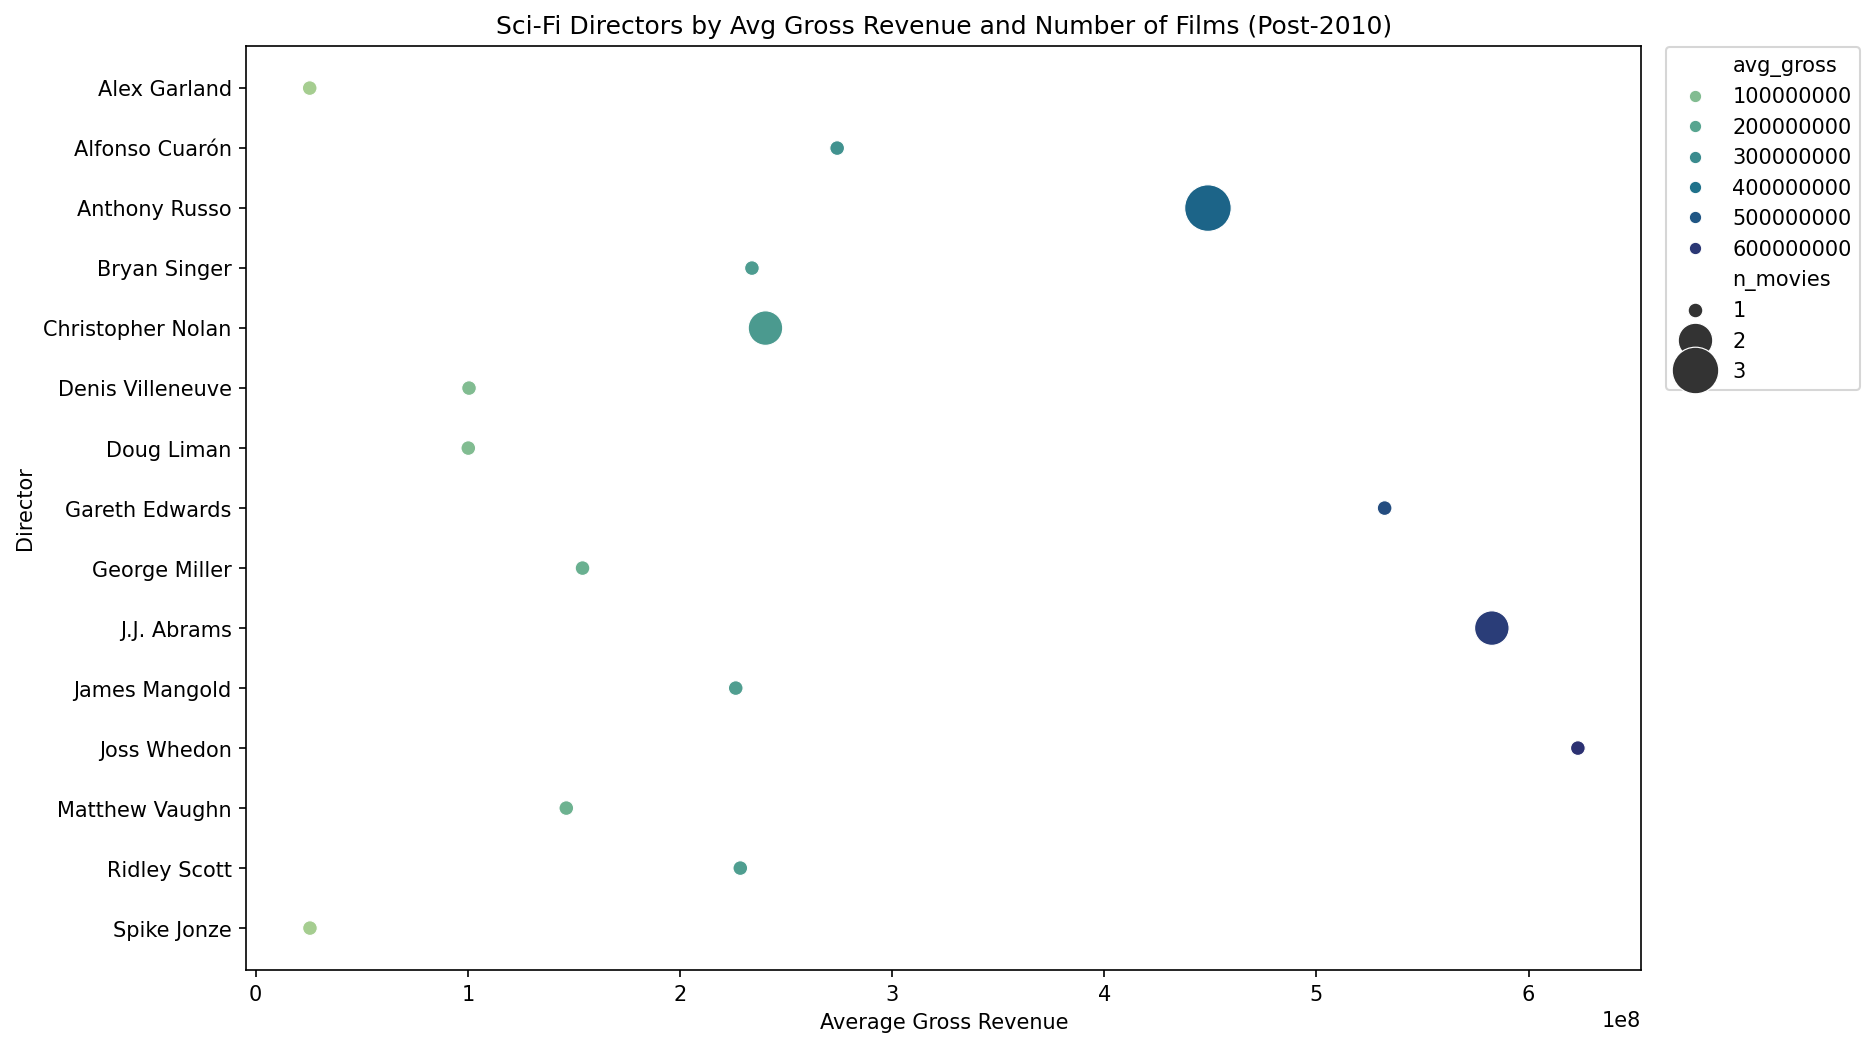

In [23]:
yb_sci_fi_df = df[(df['Sci-Fi'] == 1) & (df['Released_Year'] >= 2010)]

yb_sci_fi_directors = yb_sci_fi_df.groupby('Director').agg(
    avg_gross=('Gross', 'mean'), 
    n_movies=('Series_Title', 'count')
).reset_index()

plt.figure(figsize=(12,8), dpi=150)
sns.scatterplot(
    data=yb_sci_fi_directors,
    y='Director',
    x='avg_gross',
    size='n_movies',
    sizes=(50, 500),
    hue='avg_gross',
    palette='crest',
)

plt.xlabel('Average Gross Revenue')
plt.ylabel('Director')
plt.title('Sci-Fi Directors by Avg Gross Revenue and Number of Films (Post-2010)')
plt.legend(bbox_to_anchor=(1.01, 1.01), loc='upper left')
plt.show()

- It is expected that major franchises, such as The Avengers (represented by Joss Whedon and Anthony Russo) and Star Wars (represented by Gareth Edwards and J.J. Abrams), dominate the top spots, a result closely tied to massive studio-backed productions. However, it is also evident that experienced directors outside these mega-franchises, such as Christopher Nolan, Alfonso Cuarón, Denis Villeneuve and Ridley Scott, have achieved exceptional box office performance with more independent or auteur Sci-Fi projects.
- Interestingly, only two directors released two Sci-Fi movies during this period and only one released three, indicating that, since there is little repetition of names, the recent Sci-Fi boom may be driven by factors other than directors.

#### Sci-Fi’s Most Featured Actors (Post-2010)

- The Sci-Fi movie industry doesn’t appear to be heavily director-driven. But what about the main actors? Let’s find out.

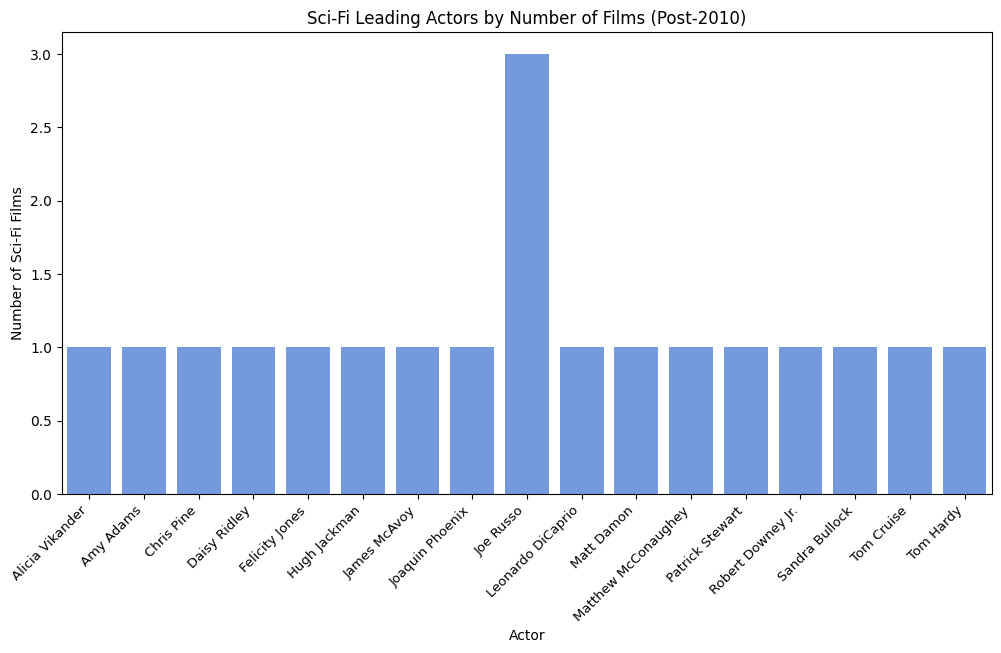

In [24]:
yb_sci_fi_stars = yb_sci_fi_df.groupby('Star1').agg(
    n_movies=('Series_Title', 'count')).reset_index()

plt.figure(figsize=(12,6),dpi=100)
sns.barplot(
    data=yb_sci_fi_stars,
    y='n_movies',
    x='Star1',
    color='cornflowerblue'
)

plt.xticks(rotation=45, ha='right', fontsize=9.5)
plt.ylabel('Number of Sci-Fi Films')
plt.xlabel('Actor')
plt.title('Sci-Fi Leading Actors by Number of Films (Post-2010)')
plt.show()

- It is notable that almost all actors mirrored the directors’ pattern of appearing in only one Sci-Fi film since 2010. Rather than a single actor consistently driving the audience, it is a group of established Hollywood stars, often award-winning, nominated and widely recognized. This suggests that casting well-known, critically acclaimed actors is a key factor in maximizing audience interest and box office performance in this genre, particularly outside major franchises, which is the only case where some repetition occurs.
- **Note:** Joe Russo is listed as an actor due to a minor data inconsistency and Robert Downey Jr. would likely occupy this position, which aligns with the previous chart showing four MCU movies.

#### Drivers of Sci-Fi Box Office Success (Post-2010)

- Finally, let’s revisit our initial insights to check if they also hold true in the Sci-Fi genre.

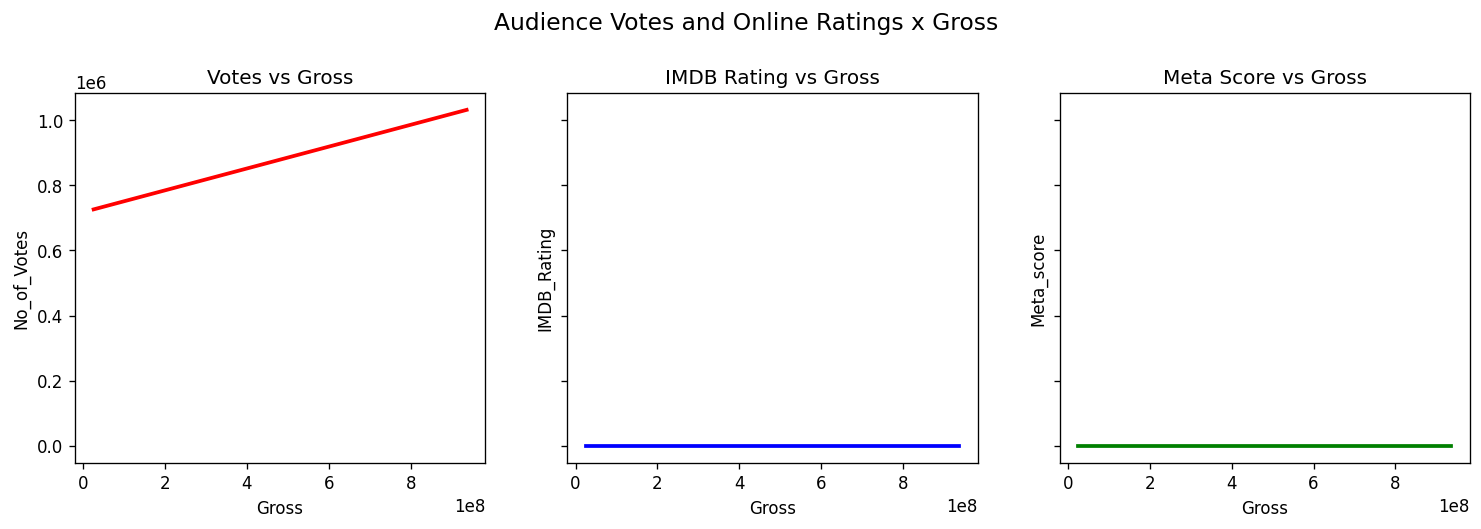

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(15,4), dpi=120, sharey=True)

# Votes
sns.regplot(
    data=yb_sci_fi_df,
    y='No_of_Votes', x='Gross',
    scatter=False, ci=None, color='red', ax=axes[0]
)
axes[0].set_title("Votes vs Gross")

# IMDB Rating
sns.regplot(
    data=yb_sci_fi_df,
    y='IMDB_Rating', x='Gross',
    scatter=False, ci=None, color='blue', ax=axes[1]
)
axes[1].set_title("IMDB Rating vs Gross")

# Meta Score
sns.regplot(
    data=yb_sci_fi_df,
    y='Meta_score', x='Gross',
    scatter=False, ci=None, color='green', ax=axes[2]
)
axes[2].set_title("Meta Score vs Gross")

plt.suptitle("Audience Votes and Online Ratings x Gross ", fontsize=14, y=1.05)
plt.show()

- It appears that our previous perceptions are also correct in this context. Gross and Number of Votes appear to be highly correlated, which implies that movies with higher user votes tend to achieve higher box office revenue. On the other hand, the Metacritic Score and the IMDb Rating seem to have little to no effect, pointing out that online ratings do not significantly impact grossing.

### Final Thoughts

- Based on our analysis, Sci-Fi appears to be the top-grossing genre in the movie industry nowadays. According to The Numbers, a widely used and reliable source for box office data, since 2008 Sci-Fi productions have consistently accounted for at [least 10% of the entire box office market share](https://www.the-numbers.com/market/creative-type/Science-Fiction) (with 2019 likely being an exception due to the pandemic). This finding corroborates our thesis, especially when considering the strategy of major studios, such as Apple TV, [of increasingly investing in the genre](https://thenodmag.com/content/apple-tv-science-fiction-content-strategy-severence-foundation).
- While established franchises are generally a safe bet, audiences seem to be drawn primarily to the Sci-Fi genre itself and the promise of an immersive story. Outside these major film series, there are no specific directors or actors who consistently drive audiences to the cinema. Instead, success appears to depend on a combination of a well-known and respected cast, strong direction and a creative plot. All of these factors may contribute to strong online engagement, reach and popularity, which, unlike critical ratings, have proven to be stronger predictors of revenue success.

- And to wrap this section up, I’d like to share a personal recommendation: a film I often suggest to people I don’t even know. It’s part of this very Sci-Fi subset we just created and, not by coincidence, it stands as the most highly voted one. Who knows it might even serve as inspiration for the next big hit!

<div style="text-align: center;">
  <a href='https://www.imdb.com/pt/title/tt1375666/'><img src='./assets/inception.jpg'/>
  </a>
</div>

## Part 2: Predictive Analysis

- This next section will focus on predicting the IMDb rating using the movie dataset we just analyzed. Some factors should be considered when selecting the most appropriate algorithm:

> **1.** We aim to predict a continuous value, so this is a regression problem.
> 
> **2.** The dataset still contains a notable number of missing values.
> 
> **3.** There are a few, but important, categorical columns. They could be encoded, such as Genre, but this comes with the risk of significantly increasing the dataset’s dimensionality.

- Based on these requirements, **CatBoost** is the most suitable model, as it effectively handles NaN values and both numerical and categorical features. This algorithm is an advanced implementation of gradient boosting and uses optimized decision trees to capture non-linear relationships and feature interactions, making it well-suited for our problem. However, CatBoost can be computationally intensive and slower to train compared to simpler algorithms, especially when dealing with larger datasets. Hence, proper hyperparameter tuning is essential to achieve optimal performance.

### Data Preparation and Feature Selection

In [26]:
drop_cols = ['Series_Title', 'Overview', 'IMDB_Rating', 'YearBlock']

X = df.drop(columns=drop_cols)
y = df['IMDB_Rating']

In [27]:
cat_cols = ['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

- In this step, we prepared the dataset for modeling by defining the features (X) and target (y). The target column `IMDB_Rating` was separated, while other columns (`Series_Title`, `Overview`, `YearBlock`) were dropped because they contained mostly textual information or offered little predictive value. Important categorical features (`Certificate`, `Director`, `Star1–Star4`) were identified for handling by CatBoost. The data was then split into training and test sets, with the training portion later subdivided to create a validation set for hyperparameter tuning.

### Hyperparameter Optimization

In [29]:
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):

    X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_train, y_train, test_size=0.15, random_state=101)
    
    params = {
        'iterations': trial.suggest_int('iterations', 100, 600),
        'depth': trial.suggest_int('depth', 2, 6),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 3, 10),
        'random_seed': 101,
        'verbose': False
    }

    model_opt = CatBoostRegressor(**params)
    model_opt.fit(X_train_opt, y_train_opt, cat_features=cat_cols, eval_set=(X_test_opt, y_test_opt), early_stopping_rounds=50)

    y_pred_opt = model_opt.predict(X_test_opt)
    rmse = np.sqrt(mean_squared_error(y_test_opt, y_pred_opt))

    return rmse

optuna.logging.set_verbosity(optuna.logging.CRITICAL)
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=101))
study.optimize(objective, n_trials=50)

print(f"Best RMSE: {study.best_value:.4f}")
print("Best parameters:", study.best_params)

Best RMSE: 0.1571
Best parameters: {'iterations': 531, 'depth': 3, 'learning_rate': 0.13998730119693956, 'l2_leaf_reg': 8}


- We now performed hyperparameter tuning for the CatBoost model using Optuna. A separate validation split is created from the training data to evaluate each trial and Optuna automatically suggests values for key hyperparameters while the model is trained and evaluated on this validation subset. The root mean squared error on the validation data is used as the objective metric, because it penalizes larger errors more heavily and measures the average prediction error in the same units as the target, facilitating interpretation.
- This process yielded a very satisfactory result, with an RMSE of approximately **0.1571**, indicating that the model was able to predict the targets with good accuracy.

### Final Model Training and Evaluation

In [30]:
best_params = study.best_params

In [31]:
cat_model = CatBoostRegressor(**best_params)
cat_model.fit(X_train, y_train, cat_features=cat_cols, eval_set=(X_test, y_test), early_stopping_rounds=50, verbose = False)

In [32]:
from sklearn.metrics import mean_squared_error

y_pred = cat_model.predict(X_test)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Final Model RMSE: {rmse_final:.4f}")

Final Model RMSE: 0.1616


- After identifying the best hyperparameters, we trained the final model on the entire training set. It was then evaluated on the hold-out test set, which was not used during training or hyperparameter optimization, providing an unbiased estimate of real-world performance. The RMSE on this set is slightly higher, as the model is predicting previously unseen data, but remains a very satisfying result.

### Predicting New Data

- For our final task of this notebook, let's demonstrate how the trained CatBoost model can be used to predict the IMDb rating for a new movie.

In [33]:
import json

movie_json = """
{
    "Series_Title": "The Shawshank Redemption",
    "Released_Year": 1994,
    "Certificate": "A",
    "Runtime": "142 min",
    "Genre": "Drama",
    "Overview": "Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.",
    "Meta_score": 80.0,
    "Director": "Frank Darabont",
    "Star1": "Tim Robbins",
    "Star2": "Morgan Freeman",
    "Star3": "Bob Gunton",
    "Star4": "William Sadler",
    "No_of_Votes": 2343110,
    "Gross": "28,341,469"
}
"""

#### Conversion and Transformations

In [34]:
movie_data = json.loads(movie_json)
df_input = pd.DataFrame([movie_data])

In [35]:
df_input['Gross'] = df_input['Gross'].str.replace('[\,]', '', regex=True).astype(float)
df_input['Runtime'] = df_input['Runtime'].str.replace(' min','').astype(int)
df_input['Released_Year'] = df_input['Released_Year'].astype(int)

In [36]:
for g in genre_cols:
     df_input[g] = 1 if g == movie_data['Genre'] else 0

- Our model expects a specific set of features, so here we transformed the new movie data into a DataFrame that matches the structure used during training, including proper ordering and one-hot encoding of categorical variables.

#### Prediction

In [37]:
drop_cols_input = ['Series_Title', 'Overview', 'Genre']
df_input = df_input.drop(columns=drop_cols_input)

In [38]:
y_pred = cat_model.predict(df_input)
print(f"Predicted IMDb rating: {y_pred[0]:.2f}")

Predicted IMDb rating: 8.92


- As we can see, we were able to provide this new data to the model, which predicted an IMDb rating of **8.92**. This is quite impressive, considering that the actual rating of The Shawshank Redemption on IMDb is **9.3**. This indicates that the model captures the main patterns in the dataset and can provide reasonably accurate predictions even for unseen movies.

## Part 3: Conclusion

- In this notebook, we dove deeper into a movie dataset with the intention of understanding the key factors behind commercial success to guide future business-oriented decisions. We began with an exploratory data analysis to clean and manipulate the data, uncover patterns across variables and visualize relationships to formulate hypotheses. Then, we moved into predictive modeling intending estimate possible ratings based on our data. Our final model achieved strong predictive performance, providing reliable insights into IMDb ratings.
- In summary, this analysis highlighted the importance of key factors such as current genre trend, cast relevance and online audience engagement in driving commercial success. Altogether, the results provide a strong foundation for data-driven decision-making in the movie industry and open opportunities for further research using external data sources.

- The trained CatBoost model is saved to disk in .pkl format for future use or deployment.

In [39]:
import pickle

with open('./model/catboost_movie_model.pkl', 'wb') as f:
    pickle.dump(cat_model, f)

---

<div style="text-align: center; font-size: 0.85em; color: #555;">
    <p>This notebook was created for educational purposes only. The data and analysis presented here are intended to illustrate exploratory data analysis and machine learning techniques.</p>
    <p>Author: Pedro Siqueira |
    <a href="https://www.linkedin.com/in/phenriquels/" target="_blank">LinkedIn</a> |
    <a href="https://github.com/phenriquels01" target="_blank">GitHub</a></p>
</div>